## CM4044: AI In Chemistry
## Semester 1 2020/21

<hr>

## Tutorial 5.3: Common Machine Learning (ML) Algorithms Part III
## Objectives

### $\bullet$ kNN (k-Nearest Neighbours)
### $\bullet$ K-Means

<hr>

This tutorial continues the second part of the same topic, "Introduction to Common Machine Learning Algorithms".

### 1. kNN (k-Nearest Neighbours)

#### 1.1 Background
<u>It can be used for both classification and regression problems. However, it is more widely used in classification problems in the industry.</u> K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The case being assigned to the class is most common amongst its k nearest neighbors measured by <span style="color:red">a distance function</span>.

These distance functions can be <u>Euclidean, Manhattan, Minkowski and Hamming distance</u>. First three functions are used for continuous function and fourth one (Hamming) for categorical variables. If k = 1, then the case is simply assigned to the class of its nearest neighbor. At times, choosing k turns out to be a challenge while performing kNN modeling.

<img src="./kNN.jpg" width="300" height="400" />

kNN can easily be mapped to our real lives. If you want to learn about a person, of whom you have no information, you might like to find out about his close friends and the circles he moves in and gain access to his/her information!

#### Things to consider before selecting kNN:

- kNN is computationally expensive
- Variables should be normalized else higher range variables can bias it
- Works on pre-processing stage more before going for kNN like outlier, noise removal

### 1.2 An Example: iris classification

We will still study the iris classification

Firstly, we need to load and explore the data. Below is the program for this purpose.

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# Load dataset
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris = pd.read_csv("./iris.csv", names=names)


# shape
print(iris.shape)

print()

# head
print(iris.head(5))

print()

# data column description
print(iris.info())

(150, 5)

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


We train a primitive K-Nearest Neighbours classifer based on the taining data and check its accuracy.

In [2]:
scoring = 'accuracy'

# Split-out validation dataset
array = iris.to_numpy()
X = array[:,0:4]
Y = array[:,4]   # an array of label, which is a string of the class name of iris

#train test split
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)


# apply to three groups
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

Y_test_pred = knn.predict(X_test)

# evaluate accuracy
print("accuracy: {:.3f}".format(accuracy_score(Y_test, Y_test_pred)))



accuracy: 0.900


Use k-fold cross validation to search for the optimal value of hyperparameter `K`. The accuracy score is stored in a list.

In [3]:
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Plot the `Accuracy` vs. `K` to know the best `K` value.

The optimal number of neighbors is 13


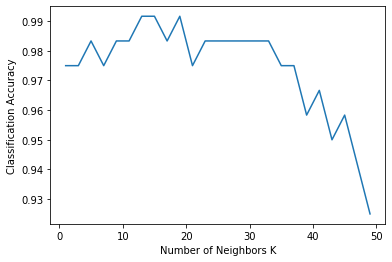

In [4]:
# changing to misclassification error
mse = [x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(max(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Classification Accuracy")
plt.show()

Use the best `K` value to rebuild the model and do the prediction.

accuracy: 0.900
Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa                7                0               0
Iris-versicolor            0               10               2
Iris-virginica             0                1              10


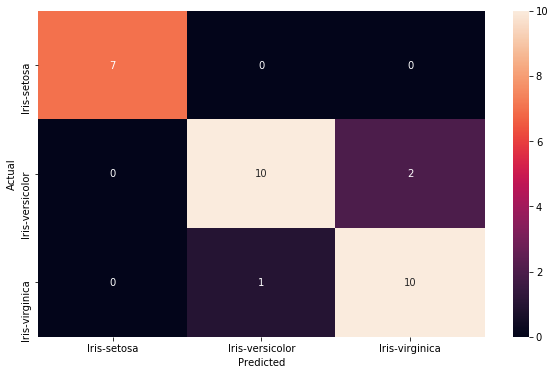

In [5]:
# apply to three groups
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,Y_train)

Y_test_pred = knn.predict(X_test)
#evaluate the classifier by score
print("accuracy: {:.3f}".format(accuracy_score(Y_test, Y_test_pred)))
#evaluate the classifier by confusion matrix
confusion_matrix = pd.crosstab(Y_test, Y_test_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

Finally, the k-Nearest Neighbor method has two interface in the scikit-learn:

- classifier

`class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)`

The details in scikit-learn about this classifier is [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- regressor

`class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)`

The details in scikit-learn about this regressor is [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

## 2. K-Means Clustering

### 2.1 Background

**Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data.** Data clustering is a <u>unsupervised algorithm</u> because there is no specified label information in data set. A very popular algorithm for data clustering is <u>K-Means Clustering.</u> Its procedure follows a simple and easy  way to classify a given data set through a certain number of  clusters (assume `K` clusters). Data points inside a cluster are homogeneous and heterogeneous to peer groups. 

Remember figuring out shapes from ink blots? K-Means is somewhat similar this activity. You look at the shape and spread to decipher how many different clusters / population are present!

<img src="./Figures/splatter_ink_blot.jpg" width="300" height="300" />

How K-means forms cluster:

1. K-means picks k number of points for each cluster known as centroids.
1. Each data point forms a cluster with the closest centroids i.e. k clusters.
1. Finds the centroid of each cluster based on existing cluster members. Here we have new centroids.
1. As we have new centroids, repeat step 2 and 3. Find the closest distance for each data point from new centroids and get associated with new k-clusters. Repeat this process until convergence occurs i.e. centroids does not change.

**How to determine value of K: The Elbow Method**

In K-means, we have clusters and each cluster has its own centroid. Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. 

<img src="./KMeans_Elbow.png" width="500" height="500" />

**How to evaludate the accuracy of KMean Clustering**


### 2.2 An Example: mall customers clustering

This example is adopted from the website blogs [here](https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad) and [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

The data set has information of 200 customers of a mall on customerID, genre, age, annual income and spending score of each customer. Spending score is a score computed for each of mall’s clients based on several criteria including, for instance, their income, the number of times per week they come to the mall and the money they spent in a year. This score is between 1–100. Our target in this model will be to divide the customers into a reasonable number of segments and determine the segments of the mall customers. This is an unsupervised learning task.

Load dataset and explore the data structure in the scatter graph

(200, 5)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


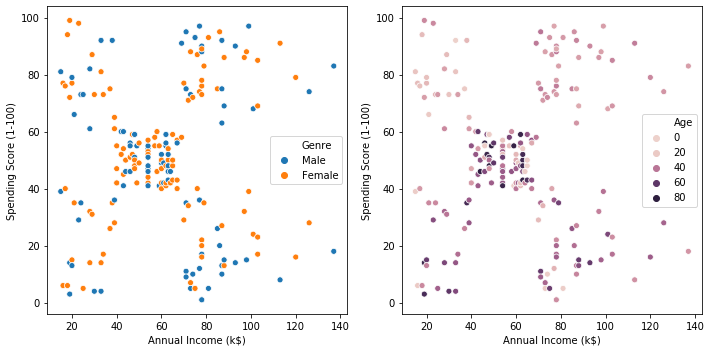

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('./Mall_Customers.csv')

# shape
print(df.shape)

print()

# head
print(df.head(5))

print()

# data column description
print(df.info())

x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
hue1 = df['Genre']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x=x, y=y, hue=hue1)

hue2 = df['Age']
plt.subplot(1,2,2)
sns.scatterplot(x=x, y=y, hue=hue2)

plt.tight_layout()

Now, we apply K-Means clustering based on two features: `Annual Income (k$)` and `Spending Score (1-100)` 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB
None

[[86.53846154 82.12820513]
 [44.15447154 49.82926829]
 [87.         18.63157895]]



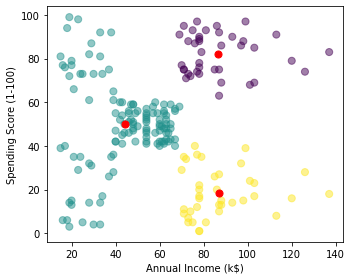

In [7]:
#Select the annual income and the spending score columns 

features = ['Annual Income (k$)', 'Spending Score (1-100)']
X=df[features]
print(X.info())
print()

# three groups
kmeans = KMeans(n_clusters=3)    # the most important hyperparameter is the cluster number
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
print()

fig, ax = plt.subplots(1,1,figsize=(5,4))

#plt.scatter(df['val1'], df['val2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.show()

# Plot also the training points
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

Search the best cluster number `K`, the Elbow method. 

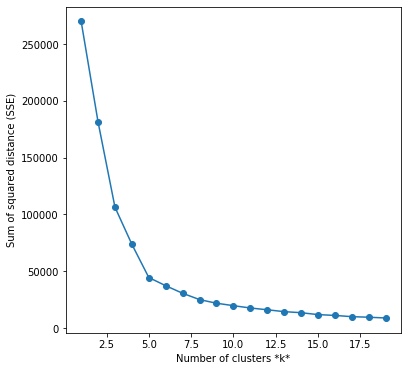

In [8]:
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance (SSE)');

- So the value of `K = 5` is the joint point of elbow.
- Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

Now we use the optimal `K` value to do clustering on the data set.

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]



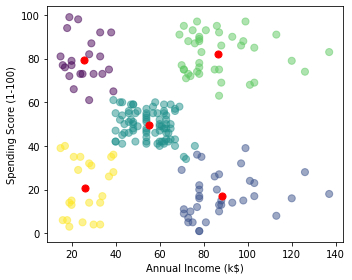

In [9]:
# five groups
kmeans = KMeans(n_clusters=5)    # the most important hyperparameter is the cluster number
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print(centroids)
print()

fig, ax = plt.subplots(1,1,figsize=(5,4))

#plt.scatter(df['val1'], df['val2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.show()

# Plot also the training points
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

**Silhouette analysis** can be used to determine the degree of separation between clusters.

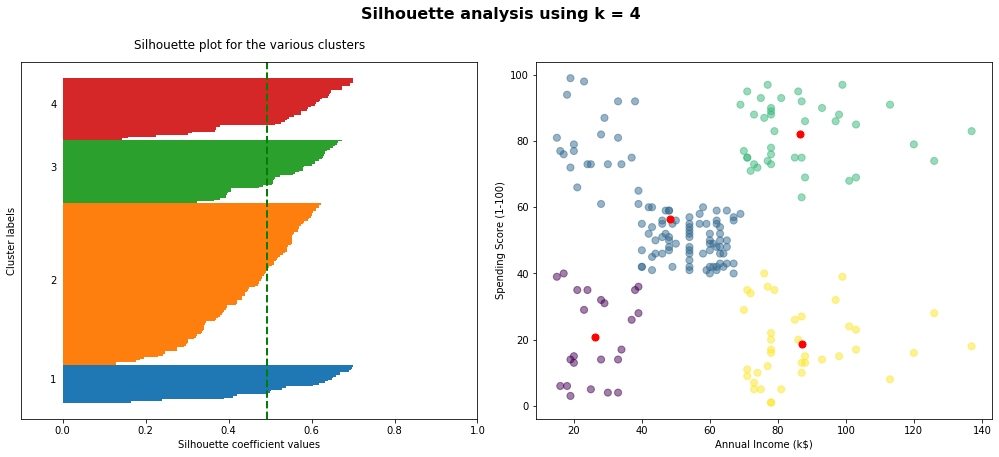

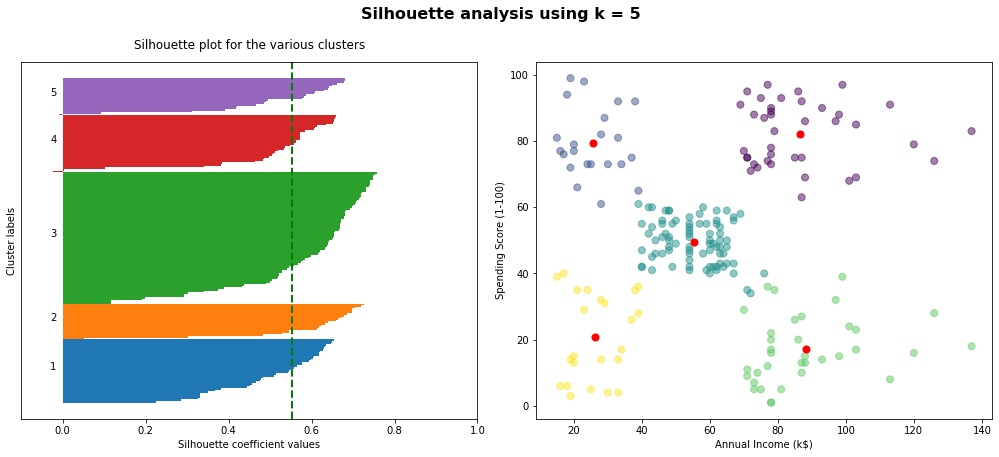

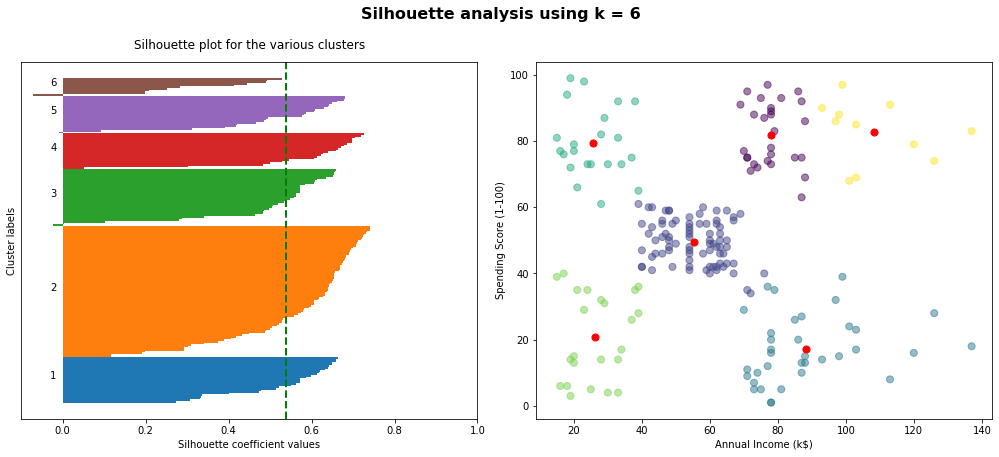

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([4, 5, 6]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(14, 6)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c= labels, s=50, alpha=0.5)
    ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    ax2.set_xlabel('Annual Income (k$)')
    ax2.set_ylabel('Spending Score (1-100)')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

As the above plots show, `n_clusters=5` has the best average silhouette score of around 0.7 and all clusters being above the average shows that it is actually a good choice. Also, the **thickness** of the silhouette plot gives an indication of how big each cluster is. The plot shows that cluster 1 has almost double the samples than cluster 2. Except for cluster 1, all other clusters have comparable data size. However, as we changed n_clusters to 4, although the average silhouette score decreased not very much, but the size of cluster 1 is far bigger than other clusters and the silhouette score for cluster 1 is the smallest. When `n_cluster2=6`, cluster 1 size is too small with too low silhouette score and cluster 6 has much fewer size compared to the other clusters. The bottom line is: Good `k` will have a well above 0.5 silhouette average score as well as all of the clusters have higher than the average score, and there is no group with very small number of cluster size.

The interface of K-Means Clustering in scikit_learn is below:

`class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')`

The details of this method in scikit-learn is [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=k%20mean#sklearn.cluster.KMeans)